In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

In [3]:
parking=pd.read_excel('parking.xls')

In [5]:
parking.head()

,Bldg City,Bldg State,Bldg Status,Property Type,Total Parking Spaces,Owned/Leased
0,HARTFORD,CT,ACTIVE,BUILDING,29,OWNED
1,NEW HAVEN,CT,ACTIVE,BUILDING,0,OWNED
2,WATERBURY,CT,ACTIVE,BUILDING,2,LEASED
3,WILLIMANTIC,CT,ACTIVE,BUILDING,0,LEASED
4,HARTFORD,CT,ACTIVE,BUILDING,103,OWNED


In [6]:
parking.tail()

,Bldg City,Bldg State,Bldg Status,Property Type,Total Parking Spaces,Owned/Leased
9055,FALLON,NV,ACTIVE,BUILDING,12,LEASED
9056,ELKO,NV,ACTIVE,BUILDING,2,LEASED
9057,LAS VEGAS,NV,ACTIVE,BUILDING,3,LEASED
9058,LAS VEGAS,NV,ACTIVE,BUILDING,24,LEASED
9059,LAS VEGAS,NV,ACTIVE,BUILDING,7,LEASED


In [8]:
parking.shape

(9060, 6)

In [9]:
parking.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9060 entries, 0 to 9059
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Bldg City             9060 non-null   object
 1   Bldg State            9060 non-null   object
 2   Bldg Status           9060 non-null   object
 3   Property Type         9060 non-null   object
 4   Total Parking Spaces  9060 non-null   int64 
 5   Owned/Leased          9060 non-null   object
dtypes: int64(1), object(5)
memory usage: 424.8+ KB


In [11]:
parking['Bldg Status'].value_counts()

ACTIVE            8981
EXCESS              70
DECOMMISSIONED       9
Name: Bldg Status, dtype: int64

In [12]:
parking['Property Type'].value_counts()

BUILDING     8602
STRUCTURE     339
LAND          119
Name: Property Type, dtype: int64

In [13]:
parking['Bldg State'].value_counts()

TX    886
CA    746
DC    486
VA    440
FL    413
MD    403
NY    367
PA    245
CO    242
WA    242
IL    241
MI    235
AZ    222
GA    218
NC    212
MO    209
OH    201
IN    157
TN    152
MT    150
LA    149
NJ    146
KY    137
NM    136
OK    130
MA    127
AL    124
WI    122
WV    106
OR    105
MN     98
ME     97
UT     96
SC     95
MS     87
AR     83
ND     80
NV     75
VT     75
KS     74
IA     74
SD     66
ID     63
CT     58
NE     51
WY     45
NH     39
DE     28
RI     27
Name: Bldg State, dtype: int64

In [14]:
parking.columns

Index(['Bldg City', 'Bldg State', 'Bldg Status', 'Property Type',
       'Total Parking Spaces', 'Owned/Leased'],
      dtype='object')

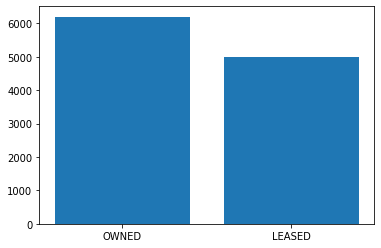

In [16]:
plt.bar(parking['Owned/Leased'],parking['Total Parking Spaces']);

              Total Parking Spaces
Owned/Leased                      
LEASED                   44.707349
OWNED                    74.627358


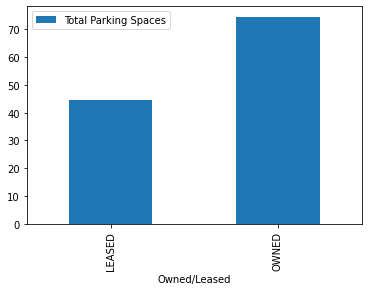

In [38]:
parking_owner=pd.pivot_table(parking,index='Owned/Leased', values='Total Parking Spaces')
print(parking_owner)
parking_owner.plot(kind='bar');


              Total Parking Spaces
Owned/Leased                      
LEASED                   44.707349
OWNED                    74.627358


In [22]:
parking_owner=pd.pivot_table(parking,index='Owned/Leased', values='Total Parking Spaces',aggfunc='sum')
print(parking_owner)

              Total Parking Spaces
Owned/Leased                      
LEASED                      310269
OWNED                       158210


In [39]:
parking.head()

,Bldg City,Bldg State,Bldg Status,Property Type,Total Parking Spaces,Owned/Leased
0,HARTFORD,CT,ACTIVE,BUILDING,29,OWNED
1,NEW HAVEN,CT,ACTIVE,BUILDING,0,OWNED
2,WATERBURY,CT,ACTIVE,BUILDING,2,LEASED
3,WILLIMANTIC,CT,ACTIVE,BUILDING,0,LEASED
4,HARTFORD,CT,ACTIVE,BUILDING,103,OWNED


In [46]:
excess_parking=pd.pivot_table(parking,index='Bldg State',columns='Bldg Status',values='Total Parking Spaces')
print(excess_parking)

Bldg Status      ACTIVE  DECOMMISSIONED      EXCESS
Bldg State                                         
AL            62.357724             NaN   59.000000
AR            37.000000             NaN         NaN
AZ            32.256757             NaN         NaN
CA            60.493298             NaN         NaN
CO            78.936709             NaN   22.200000
CT            29.327586             NaN         NaN
DC            41.255144             NaN         NaN
DE            15.750000             NaN         NaN
FL            51.905569             NaN         NaN
GA            76.408257             NaN         NaN
IA            27.202703             NaN         NaN
ID            39.274194        0.000000         NaN
IL            45.000000             NaN   21.000000
IN            44.069444             NaN    0.000000
KS            55.216216             NaN         NaN
KY            46.277372             NaN         NaN
LA            43.684932             NaN   68.666667
MA          

In [49]:
excess_parking=excess_parking[excess_parking.EXCESS>0]
excess_parking

Bldg Status,ACTIVE,DECOMMISSIONED,EXCESS
Bldg State,,,
AL,62.357724,NaN,59.000000
CO,78.936709,NaN,22.200000
IL,45.000000,NaN,21.000000
LA,43.684932,NaN,68.666667
MD,104.185090,0.000000,43.166667
MO,121.200000,815.333333,254.272727
NE,54.060000,NaN,19.000000
NJ,32.169118,NaN,4.300000
NV,48.648649,NaN,173.000000


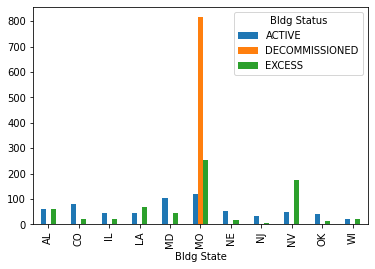

In [53]:
excess_parking.plot(kind='bar');

In [62]:
excess_parking_sort=excess_parking.EXCESS.sort_values(ascending=False)
print(excess_parking_sort)

Bldg State
MO    254.272727
NV    173.000000
LA     68.666667
AL     59.000000
MD     43.166667
CO     22.200000
WI     22.000000
IL     21.000000
NE     19.000000
OK     14.000000
NJ      4.300000
Name: EXCESS, dtype: float64


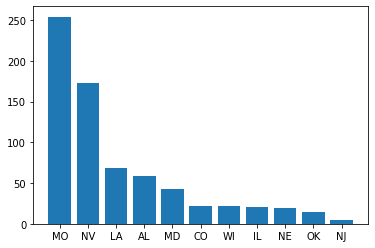

In [63]:
plt.bar(excess_parking_sort.index,excess_parking_sort.values);

In [64]:
parking.head()

,Bldg City,Bldg State,Bldg Status,Property Type,Total Parking Spaces,Owned/Leased
0,HARTFORD,CT,ACTIVE,BUILDING,29,OWNED
1,NEW HAVEN,CT,ACTIVE,BUILDING,0,OWNED
2,WATERBURY,CT,ACTIVE,BUILDING,2,LEASED
3,WILLIMANTIC,CT,ACTIVE,BUILDING,0,LEASED
4,HARTFORD,CT,ACTIVE,BUILDING,103,OWNED


In [80]:
deco_parking=parking[parking['Bldg Status']=='DECOMMISSIONED']


In [79]:
deco_parking

,Bldg City,Bldg State,Bldg Status,Property Type,Total Parking Spaces,Owned/Leased
429,PORTHILL,ID,DECOMMISSIONED,BUILDING,0,OWNED
1933,MOOERS,NY,DECOMMISSIONED,BUILDING,0,OWNED
1934,MOOERS,NY,DECOMMISSIONED,BUILDING,0,OWNED
2338,CURTIS BAY,MD,DECOMMISSIONED,BUILDING,0,OWNED
2348,CURTIS BAY,MD,DECOMMISSIONED,BUILDING,0,OWNED
5716,OVERLAND,MO,DECOMMISSIONED,BUILDING,2089,OWNED
5725,SAINT LOUIS,MO,DECOMMISSIONED,BUILDING,357,OWNED
5726,SAINT LOUIS,MO,DECOMMISSIONED,BUILDING,0,OWNED
6752,FORT WORTH,TX,DECOMMISSIONED,BUILDING,0,OWNED


In [82]:
deco_parking=parking[parking['Total Parking Spaces']>0]

<AxesSubplot:>

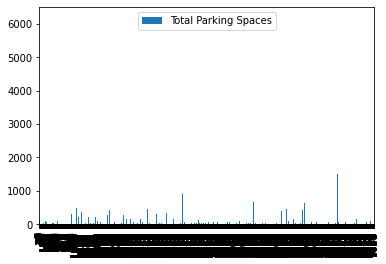

In [83]:
deco_parking

,Bldg City,Bldg State,Bldg Status,Property Type,Total Parking Spaces,Owned/Leased
0,HARTFORD,CT,ACTIVE,BUILDING,29,OWNED
2,WATERBURY,CT,ACTIVE,BUILDING,2,LEASED
4,HARTFORD,CT,ACTIVE,BUILDING,103,OWNED
5,BRIDGEPORT,CT,ACTIVE,BUILDING,131,OWNED
6,TORRINGTON,CT,ACTIVE,BUILDING,5,OWNED
...,...,...,...,...,...,...
9055,FALLON,NV,ACTIVE,BUILDING,12,LEASED
9056,ELKO,NV,ACTIVE,BUILDING,2,LEASED
9057,LAS VEGAS,NV,ACTIVE,BUILDING,3,LEASED
9058,LAS VEGAS,NV,ACTIVE,BUILDING,24,LEASED


In [76]:
excess_parking=excess_parking[excess_parking.EXCESS>0]
excess_parking

Bldg Status,ACTIVE,DECOMMISSIONED,EXCESS
Bldg State,,,
AL,62.357724,NaN,59.000000
CO,78.936709,NaN,22.200000
IL,45.000000,NaN,21.000000
LA,43.684932,NaN,68.666667
MD,104.185090,0.000000,43.166667
MO,121.200000,815.333333,254.272727
NE,54.060000,NaN,19.000000
NJ,32.169118,NaN,4.300000
NV,48.648649,NaN,173.000000


In [91]:
park_in_excess=pd.pivot_table(parking[parking['Bldg Status']=='EXCESS'],index='Property Type',values='Total Parking Spaces')

In [89]:
park_in_excess

,Total Parking Spaces
Property Type,
BUILDING,57.791045
STRUCTURE,37.000000


In [98]:
active_parking=pd.pivot_table(parking[parking['Bldg Status']=='ACTIVE'],index='Owned/Leased',values='Total Parking Spaces')

In [102]:
active_parking['Total Parking Spaces']/active_parking['Total Parking Spaces'].sum()

Owned/Leased
LEASED    0.375461
OWNED     0.624539
Name: Total Parking Spaces, dtype: float64

In [106]:
active_parking['%Contri']=(active_parking['Total Parking Spaces']/active_parking['Total Parking Spaces'].sum())*100

In [107]:
active_parking

,Total Parking Spaces,%Contri
Owned/Leased,,
LEASED,44.707349,37.546059
OWNED,74.365997,62.453941


In [127]:
stwise=pd.pivot_table(parking[parking['Owned/Leased']=='LEASED'],index='Bldg State',values='Total Parking Spaces')

In [147]:
stwisedes=stwise.sort_values('Total Parking Spaces',ascending=False,)

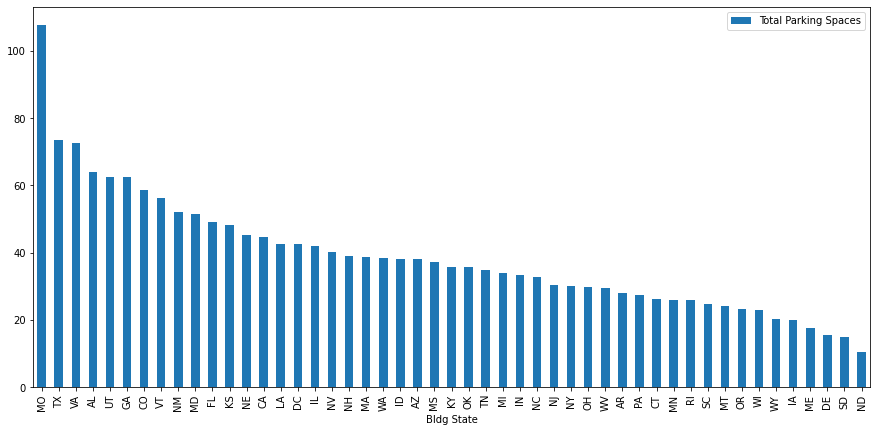

In [149]:
stwisedes.plot(kind='bar',figsize=(15,7));

In [128]:
stwise

,Total Parking Spaces
Bldg State,
AL,64.055556
AR,28.098592
AZ,38.025806
CA,44.639810
CO,58.647727
CT,26.134615
DC,42.562914
DE,15.592593
FL,49.102828
